# Multiple Linear Regression

### Import Necessary Packages

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import Dataset

In [2]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

In [3]:
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [9]:
print(california.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [10]:
print(california.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [12]:
print(california.target_names)

['MedHouseVal']


In [13]:
print(california.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [14]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [15]:
#Prepare the dataframe
df = pd.DataFrame(california.data,columns=california.feature_names)

In [16]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [17]:
df['Price'] = california.target

In [18]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Divide the dataset into independent and dependent features

In [20]:
X = df.iloc[:,:-1] #independent feature
y = df.iloc[:,-1] #dependent feature

### Train Test split 

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=10)

In [23]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((13828, 8), (13828,), (6812, 8), (6812,))

### Standardize the data

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [25]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Training

In [26]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [27]:
regressor.fit(X_train,y_train)

LinearRegression()

In [28]:
print("The coefficient or slope of features: ",regressor.coef_)
print("Intercept: ",regressor.intercept_)

The coefficient or slope of features:  [ 0.82872299  0.1231163  -0.27068752  0.32859106  0.00213572 -0.02810091
 -0.93017985 -0.89505497]
Intercept:  2.0634768086491184


### Prediction for test data

In [29]:
y_test_pred = regressor.predict(X_test)

In [30]:
y_test_pred

array([3.00397485, 2.58011486, 2.3489077 , ..., 3.09003708, 0.79152007,
       2.04477012])

In [31]:
y_test

20303    1.674
16966    3.541
10623    1.602
6146     1.408
2208     1.078
         ...  
13490    1.123
9340     3.020
17439    1.724
2602     0.838
7180     1.417
Name: Price, Length: 6812, dtype: float64

### Performance metrics

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [33]:
print('mse: ',mean_squared_error(y_test,y_test_pred))
print('mae: ',mean_absolute_error(y_test,y_test_pred))
print('rmse: ',np.sqrt(mean_squared_error(y_test,y_test_pred)))

mse:  0.5522332399363619
mae:  0.537105694300796
rmse:  0.7431239734636219


In [34]:
#Rsquare
from sklearn.metrics import r2_score

In [35]:
score = r2_score(y_test,y_test_pred)
print(score)

0.593595852643664


In [36]:
#Adjusted Rsquare
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5931179409607519

### Assumptions

1. plot a scatter plot for the prediction
    - Distribution should be Linear

Text(0, 0.5, 'Test predicted data')

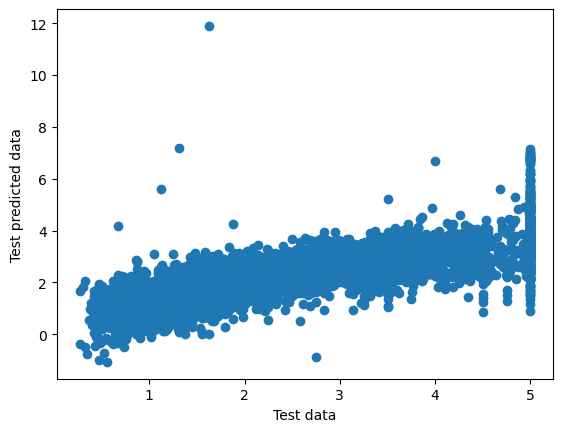

In [38]:
plt.scatter(y_test,y_test_pred)
plt.xlabel("Test data")                 # here the distribution is linear.
plt.ylabel("Test predicted data")

2. Finding residuals and plotting them
    - while plotting the curve should be normally distributed

In [39]:
residuals = y_test - y_test_pred

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

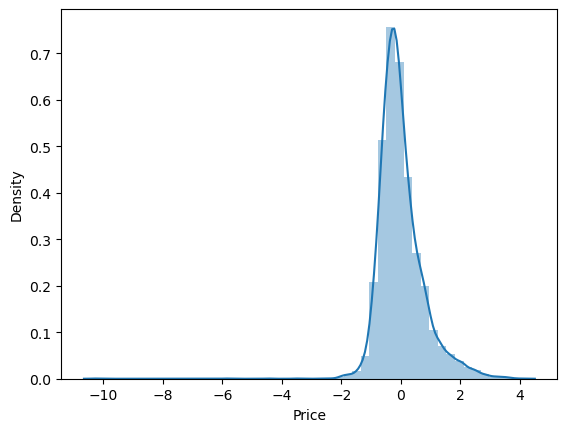

In [42]:
sns.distplot(residuals,kde=True) #normally distributed

3. Scatter plot with respect to prediction and residuals
    - we should get uniform distribution

Text(0, 0.5, 'residuals')

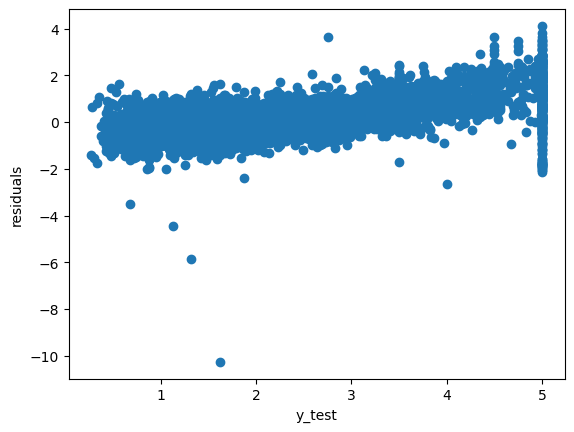

In [44]:
plt.scatter(y_test,residuals)
plt.xlabel('y_test')   #but here we didn't get uniform distributions. we have to apply differrent kind of algorithms to perform well
plt.ylabel('residuals')

